In [1]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from pathlib import Path

In [2]:
# Load data
data1 = pd.read_csv(Path.cwd() / '..' / 'data' / '22_12_29_ga.csv')
# load the pickle file for the data
data2 = pd.read_pickle(Path.cwd() / '..' / 'data' / '22_12_29_gains.pkl')
errors = pickle.load(open(Path.cwd() / '..' / 'data' / 'df_errors.pkl', 'rb'))

In [3]:
# add the Fitness column to the gains dataframe
data2['Fitness'] = data1['Fitness']

minus_err = errors["Minus_Errs"].values
plus_err = errors["Plus_Errs"].values
X = data2.drop(['Fitness'], axis=1).values
y = data2['Fitness'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
y_train_plus_errs, y_test_plus_errs, y_train_minus_errs, y_test_minus_errs = train_test_split(plus_err, minus_err, test_size=0.20, random_state=42)

# Test mse for different max_depth
mse_list = []
for i in range(1, 20):
    print(i)
    time1 = time.time()
    clf = RandomForestRegressor(n_estimators=20, max_depth=i, random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
    
    mse_list.append(mse)
    time2 = time.time()
    print('Time: ', time2 - time1)


1
Time:  4.860112905502319
2
Time:  9.351096868515015
3
Time:  13.484248876571655
4
Time:  17.376186847686768
5
Time:  21.130619049072266
6
Time:  24.717383861541748
7
Time:  28.145764112472534
8
Time:  31.3821120262146
9
Time:  34.38669991493225
10
Time:  37.219687938690186
11
Time:  39.7262659072876
12
Time:  42.233611822128296
13
Time:  44.39390707015991
14
Time:  46.134100914001465
15
Time:  47.766690731048584
16
Time:  49.14299273490906
17
Time:  50.300801038742065
18
Time:  51.30694770812988
19
Time:  52.20010495185852


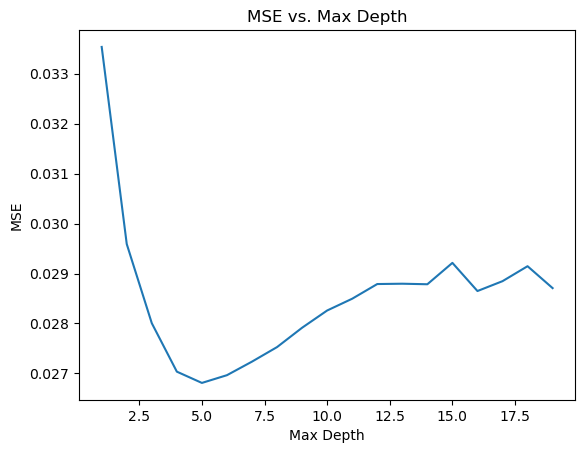

In [5]:
# Plot the results
plt.plot(range(1, len(mse_list)+1), mse_list)
plt.title("MSE vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("MSE")
plt.show()


In [6]:
# looks like i ~ 10 is the best
clf = RandomForestRegressor(n_estimators=500, max_depth=6, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

print(mse)

0.02590787636545499


Mean squared error: 0.02591


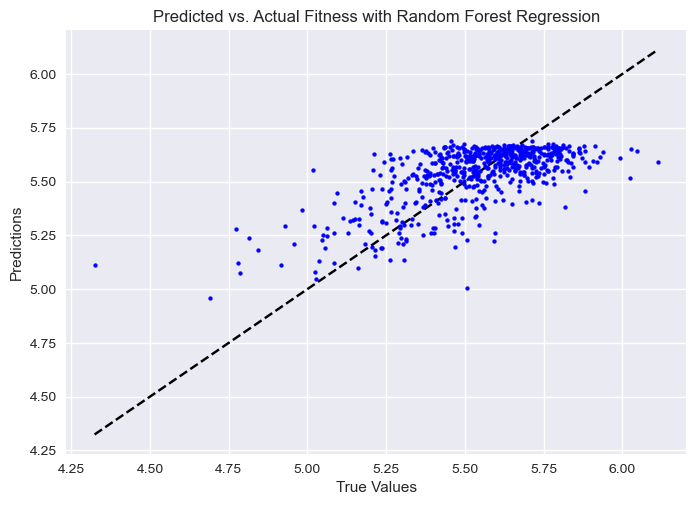

In [7]:
#print the mean squared error
print("Mean squared error: %.5f" % mse)
# Plot the predictions vs ground truth
# set style to seaborn
plt.style.use('seaborn')
plt.scatter(y_test, y_pred, s=30, c='b', marker='.', zorder=10)
minfit = np.min(y_test)
maxfit = np.max(y_test)
plt.plot([minfit, maxfit], [minfit, maxfit], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs. Actual Fitness with Random Forest Regression')
plt.show()

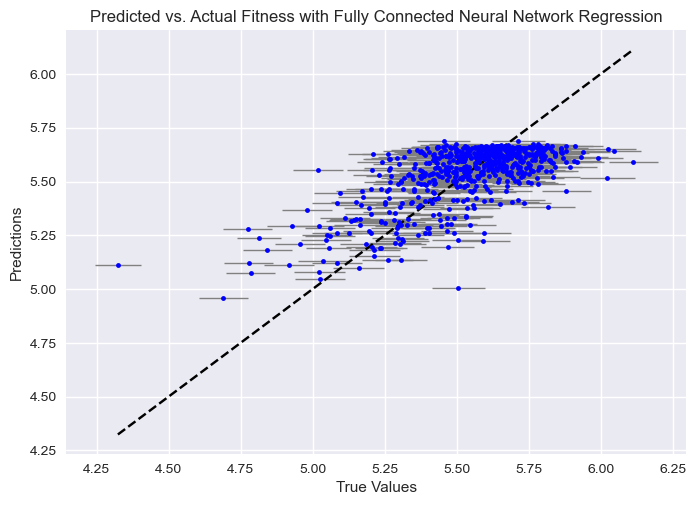

In [8]:
# set style to seaborn
plt.style.use('seaborn')
plt.errorbar(y_test, y_pred, xerr=[y_test_minus_errs, y_test_plus_errs], fmt='.', color='b',
                ecolor='gray', elinewidth=1, capsize=0.8)
minfit = np.min(y_test)
maxfit = np.max(y_test)
plt.plot([minfit, maxfit], [minfit, maxfit], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs. Actual Fitness with Fully Connected Neural Network Regression')
plt.show()

In [9]:
# calculate the percentage of the predicted data that is within the error bars
total_in = 0
for i in range(len(y_test)):
    if y_test[i] - y_test_minus_errs[i] <= y_pred[i] <= y_test[i] + y_test_plus_errs[i]:
        total_in += 1
print("Percentage of predicted data within error bars: %.2f" % (total_in / len(y_test) * 100))

Percentage of predicted data within error bars: 45.32


In [10]:
# save the model
pickle.dump(clf, open(Path.cwd() / '..' / 'data' / 'random_forest_gains.pkl', 'wb'))